# Mineria de Datos ICF-1018 
* numpy
* sklearn
* seaborn

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## PreProcesamiento

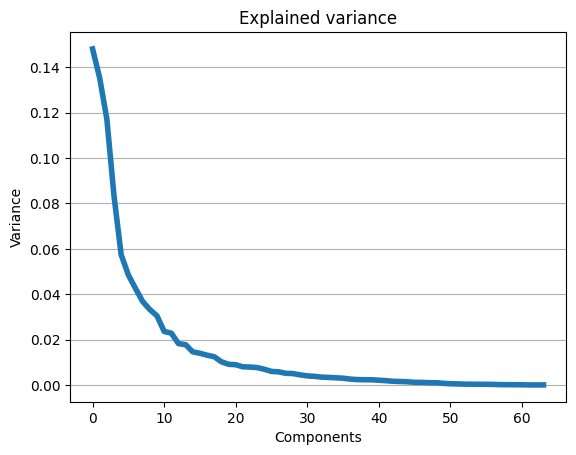

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(digits.data)

from sklearn.decomposition import PCA

pca = PCA(n_components=64)
pca.fit(X)

def plot_var_curve(X):
    plt.plot(X, lw=4)
    plt.grid(axis='y')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    plt.title('Explained variance')

import matplotlib.pyplot as plt

plot_var_curve(pca.explained_variance_ratio_)

In [13]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las componentes para retener el 90% de la varianza del dataset original
min_var(0.90,pca.explained_variance_ratio_)

22

In [14]:
pca = PCA(n_components=22)
X_= pca.fit_transform(X)
print(X_.shape)

(1797, 22)


## KNN

In [15]:
# Separar datos de entrenamiento y testeo
y = digits.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=800)
clf = nbrs.fit(X_train, y_train) # modelo de aprendizaje

In [41]:
clf.score(X_test, y_test) # metricas del modelo

0.5388888888888889

In [42]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test) #prediccion del modelo
clf_report = classification_report(y_test, y_pred,output_dict=True)
print(clf_report)

{'0': {'precision': 0.3111111111111111, 'recall': 1.0, 'f1-score': 0.4745762711864407, 'support': 28.0}, '1': {'precision': 0.8333333333333334, 'recall': 0.3333333333333333, 'f1-score': 0.47619047619047616, 'support': 30.0}, '2': {'precision': 0.5, 'recall': 0.2857142857142857, 'f1-score': 0.36363636363636365, 'support': 35.0}, '3': {'precision': 0.4050632911392405, 'recall': 0.8888888888888888, 'f1-score': 0.5565217391304348, 'support': 36.0}, '4': {'precision': 0.8947368421052632, 'recall': 0.425, 'f1-score': 0.576271186440678, 'support': 40.0}, '5': {'precision': 0.896551724137931, 'recall': 0.6666666666666666, 'f1-score': 0.7647058823529411, 'support': 39.0}, '6': {'precision': 0.46153846153846156, 'recall': 0.5294117647058824, 'f1-score': 0.4931506849315068, 'support': 34.0}, '7': {'precision': 0.8205128205128205, 'recall': 0.8, 'f1-score': 0.810126582278481, 'support': 40.0}, '8': {'precision': 0.5862068965517241, 'recall': 0.4594594594594595, 'f1-score': 0.5151515151515151, 'sup

In [43]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47        28
           1       0.83      0.33      0.48        30
           2       0.50      0.29      0.36        35
           3       0.41      0.89      0.56        36
           4       0.89      0.42      0.58        40
           5       0.90      0.67      0.76        39
           6       0.46      0.53      0.49        34
           7       0.82      0.80      0.81        40
           8       0.59      0.46      0.52        37
           9       1.00      0.10      0.18        41

    accuracy                           0.54       360
   macro avg       0.67      0.55      0.52       360
weighted avg       0.69      0.54      0.52       360



In [9]:
#  Precision = predicciones verdaderas positivas entre 
# todas las predicciones positivas

# Recall = porcentaje de predicciones verdaderas positivas entre
# todas las observaciones positivas reales.

# F1 = busca un equilibrio entre ambas Precision y Recall.

# Support = número total de ejemplos de una clase específica.

/var/folders/sf/gltrskyx6svfbktcz9p_6bs40000gn/T/ipykernel_51244/2779289533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=values, ax=axs[i], palette="viridis")
/var/folders/sf/gltrskyx6svfbktcz9p_6bs40000gn/T/ipykernel_51244/2779289533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=values, ax=axs[i], palette="viridis")
/var/folders/sf/gltrskyx6svfbktcz9p_6bs40000gn/T/ipykernel_51244/2779289533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=values, ax=axs[i], palette="viridis")


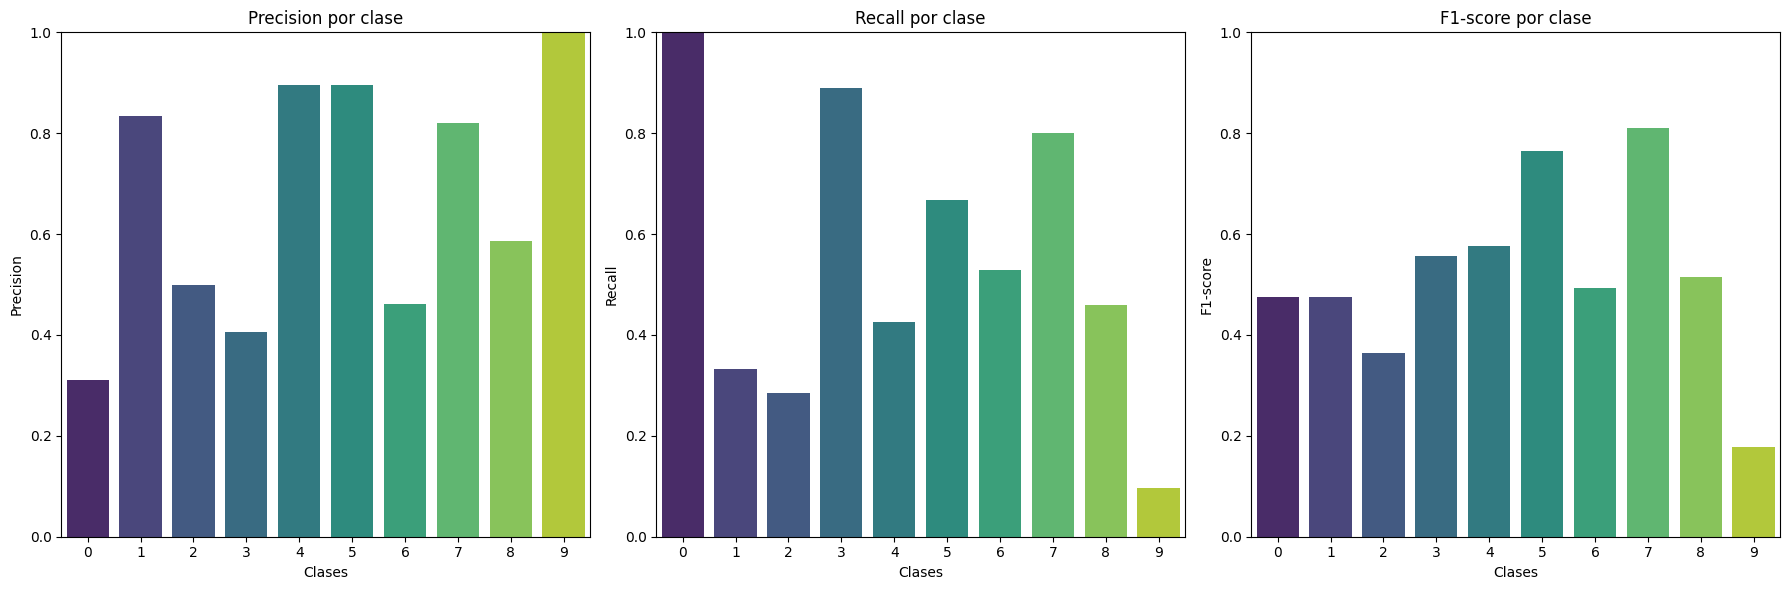

              precision    recall  f1-score   support

           0       0.31      1.00      0.47        28
           1       0.83      0.33      0.48        30
           2       0.50      0.29      0.36        35
           3       0.41      0.89      0.56        36
           4       0.89      0.42      0.58        40
           5       0.90      0.67      0.76        39
           6       0.46      0.53      0.49        34
           7       0.82      0.80      0.81        40
           8       0.59      0.46      0.52        37
           9       1.00      0.10      0.18        41

    accuracy                           0.54       360
   macro avg       0.67      0.55      0.52       360
weighted avg       0.69      0.54      0.52       360



In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Preparar los datos para graficar
classes = np.array(list(clf_report.keys())[:-3])  # Excluir 'accuracy', 'macro avg', 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Crear una figura con subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Graficar las métricas
for i, metric in enumerate(metrics):
    values = [clf_report[cls][metric] for cls in classes]
    sns.barplot(x=classes, y=values, ax=axs[i], palette="viridis")
    axs[i].set_title(f'{metric.capitalize()} por clase')
    axs[i].set_xlabel('Clases')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Imprimir el reporte de clasificación para referencia
print(classification_report(y_test, y_pred))


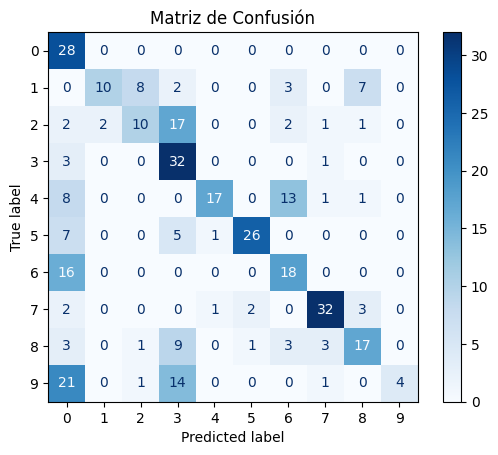

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred = clf.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

In [21]:
# graficas para dos compomentes

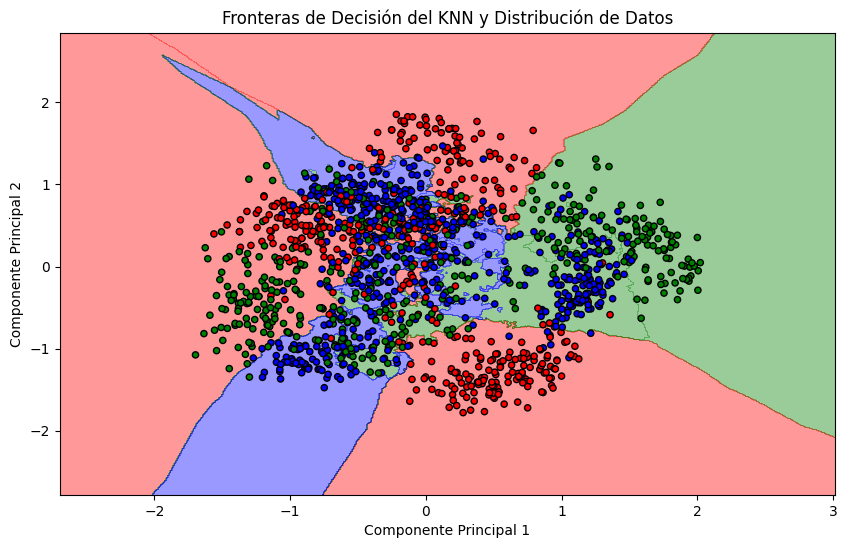

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Si los datos tienen más de dos dimensiones, reducirlos a dos con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenamiento del modelo KNN (si no está entrenado aún)
nbrs = KNeighborsClassifier(n_neighbors=10)
clf = nbrs.fit(X_train_pca, y_train)

# Crear una malla de puntos para cubrir todo el espacio de características
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clase para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear un gráfico de las fronteras de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))

# Graficar los puntos de datos originales
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title("Fronteras de Decisión del KNN y Distribución de Datos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


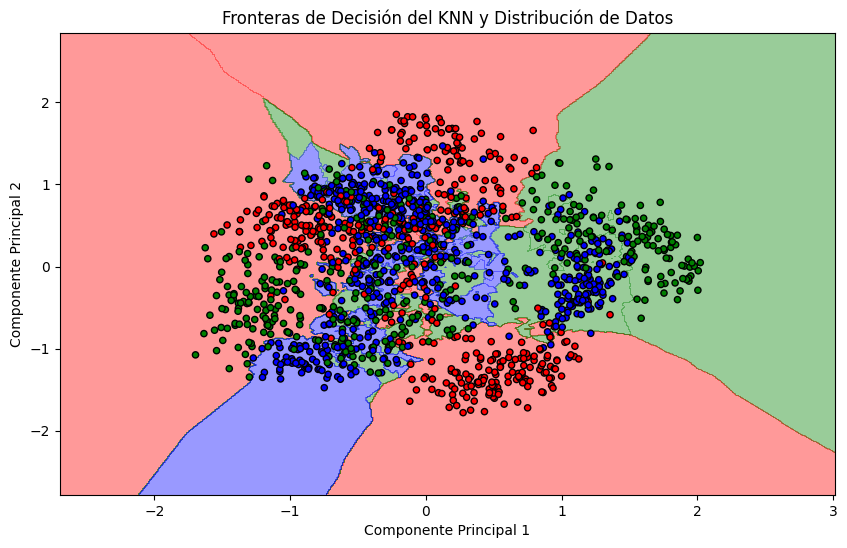

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Si los datos tienen más de dos dimensiones, reducirlos a dos con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenamiento del modelo KNN (si no está entrenado aún)
nbrs = KNeighborsClassifier(n_neighbors=5)
clf = nbrs.fit(X_train_pca, y_train)

# Crear una malla de puntos para cubrir todo el espacio de características
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clase para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear un gráfico de las fronteras de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))

# Graficar los puntos de datos originales
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title("Fronteras de Decisión del KNN y Distribución de Datos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

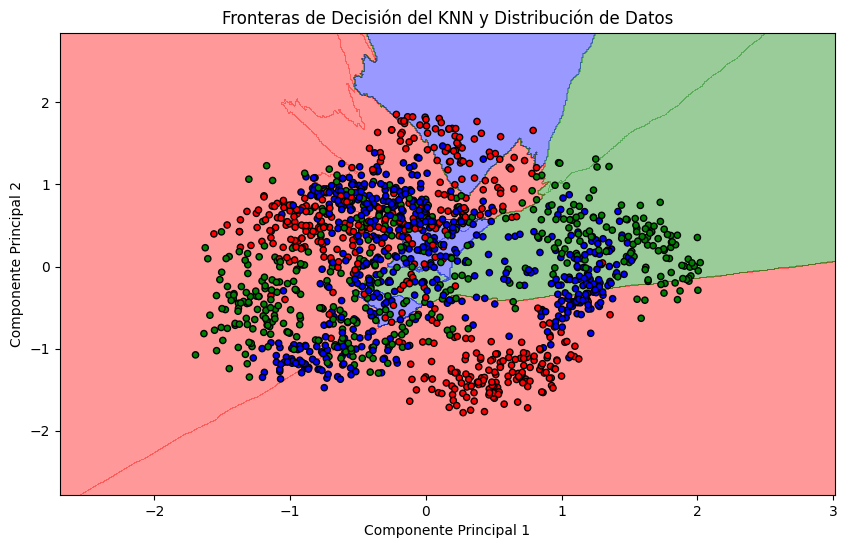

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Si los datos tienen más de dos dimensiones, reducirlos a dos con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenamiento del modelo KNN (si no está entrenado aún)
nbrs = KNeighborsClassifier(n_neighbors=800)
clf = nbrs.fit(X_train_pca, y_train)

# Crear una malla de puntos para cubrir todo el espacio de características
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clase para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear un gráfico de las fronteras de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))

# Graficar los puntos de datos originales
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title("Fronteras de Decisión del KNN y Distribución de Datos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()